### Importation et lecture des données

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("actifs_pivot.csv", index_col = 0)
dforiginal = df.copy()
df.head()

,3I GROUP PLC,3M CO,A2A SpA,AAC Technologies Holdings Inc,ABACUS PROPERTY GROUP,ABB LTD-REG,ABBOTT LABORATORIES,ABBVIE INC,ABC-MART INC,ABERCROMBIE & FITCH CO-CL A,...,Yamato Holdings Co Ltd,Yuanta Financial Holding Co Lt,ZENKOKU HOSHO CO LTD,ZEON CORP,ZIONS BANCORPORATION,ZOETIS INC,Zensho Holdings Co Ltd,Zimmer Biomet Holdings Inc,Zurich Insurance Group AG,kyowa Hakko Kirin Co Ltd
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-14,4.00200,141.60,0.8370,43.00,2.48,21.21,39.93,52.87,4875.0,51.01,...,2275.0,15.25,2615.0,877.0,67.65,81.03,1009.0,124.94,258.0,1210.0
2014-05-15,3.87600,140.98,0.8115,43.00,2.49,21.07,39.24,52.69,4795.0,49.96,...,2233.0,15.25,2545.0,901.0,66.99,79.03,1016.0,122.56,259.5,1199.0
2014-05-16,3.79300,141.13,0.8050,43.00,2.45,21.09,39.06,52.93,4840.0,49.84,...,2225.0,15.30,2540.0,886.0,66.53,79.74,1014.0,123.03,262.9,1181.0
2014-05-19,3.79300,141.67,0.8050,42.95,2.44,21.09,39.63,54.11,4885.0,50.39,...,2218.0,15.25,2493.0,869.0,66.51,80.21,1005.0,123.81,262.9,1198.0
2014-05-20,3.80234,140.23,0.8405,42.35,2.43,21.15,39.54,53.54,4875.0,49.66,...,2179.0,15.10,2459.0,873.0,66.31,79.61,1001.0,121.26,264.3,1206.0


Une forme de normalisation pour faciliter la lecture (tous les actifs sont ramenés à 1 au temps 0).

In [3]:
df = df.apply(lambda x : x/float(x.iloc[0]))

### Recherche des outliers

On commence simplement par regarder écart type pour voir si de grandes tendances se dégagent.

In [4]:
outliers = df.describe().iloc[2,:].nlargest(20).index.values
print(df.describe().iloc[2,:].nlargest(20))

SHOWA DENKO K K                 14.304060
MORINAGA & CO LTD               11.208568
Furukawa Electric Co Ltd        10.240794
DAINIPPON SCREEN MFG CO LTD      8.505486
ALL NIPPON AIRWAYS CO LTD        7.842287
UBE INDUSTRIES LTD               7.573325
St Barbara Ltd                   7.239013
SEMICONDUCTOR MANUFACTURING      7.188382
NIPPON STEEL & SUMIKIN BUSSA     7.031551
LYNAS CORP LTD                   7.011574
INMOBILIARIA COLONIAL SA         6.469133
NIPPON EXPRESS CO LTD            6.320510
DIC Corp                         6.208520
KUMAGAI GUMI CO LTD              5.648500
AOZORA BANK LTD                  5.622151
ABIOMED INC                      5.495611
SANKYU INC                       5.241882
KINTETSU CORP                    5.190165
MITSUI CHEMICALS INC             5.024207
MITSUMATERIALS CORP              4.888813
Name: std, dtype: float64


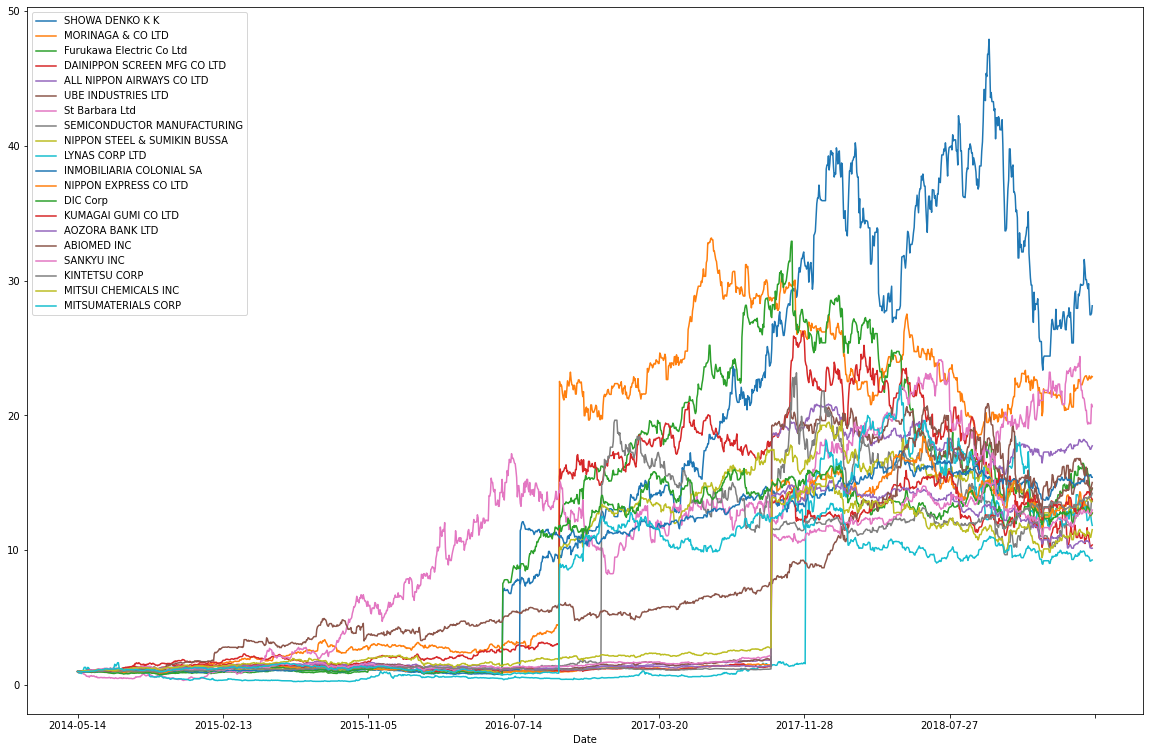

In [6]:
df[outliers].plot(figsize=(20,13))

On remarque des sauts brutaux de valeurs que l'on suppose correspondre à des opérations purement artificielles de restructuration de la capitalisation des entreprise (stocks splits/reverse splits). Nous choisissons donc d'implémenter une méthode qui nous permet de supprimer les actions au cours non représentatif afin d'éviter de fausser notre analyse.

*Remarque* : dans ce jeu de données, ces anomalies sont d'autant plus courantes pour les actions sur les places boursières japonnaises.

In [7]:
def outlier_detector(s):
    d = pd.Series(np.divide((s.values[1:] - s.values[:-1]),(s.values[:-1])) , index=s.index[:-1]).abs()
    return (d.max() > 0.5) # 0.5 ici arbitraire.
    

In [8]:
print(outlier_detector(df['MORINAGA & CO LTD']))
print(outlier_detector(df['St Barbara Ltd']))

True
False


In [9]:
df.loc[:,df.apply(outlier_detector)]

,AES CORP,AIN PHARMACIEZ INC,ALFRESA HOLDINGS CORP,ALL NIPPON AIRWAYS CO LTD,ALNYLAM PHARMACEUTICALS INC,AMOREPACIFIC CORP,AOZORA BANK LTD,ARCH CAPITAL GROUP LTD,ASAHI GLASS CO LTD,ASSA ABLOY AB-B,...,Vifor Pharma AG,WARTSILA OYJ ABP,WEICHAI POWER CO LTD-H,WHARF HOLDINGS LTD,WILLIAM DEMANT HOLDING,Welcia Holdings Co Ltd,Willis Towers Watson PLC,Windstream Holdings Inc,YAOKO CO LTD,YOKOHAMA RUBBER CO LTD
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000
2014-05-15,0.991943,1.002255,0.954397,1.004386,1.004233,0.971314,1.006579,0.992770,1.005396,0.981659,...,0.974721,0.972619,0.987319,1.008295,0.989631,0.977848,0.995197,1.0087,1.011259,0.988839
2014-05-16,0.999163,1.001127,0.949511,0.982456,1.010582,0.967312,1.000000,0.996473,0.994604,0.972052,...,0.974721,0.960238,0.980072,1.011982,0.989631,0.976266,1.006004,1.0190,0.987718,0.965402
2014-05-19,1.002093,0.997745,0.951140,0.982456,1.027513,0.929286,1.003289,0.997179,0.989209,0.972052,...,0.974721,0.960238,0.974638,0.993548,0.989631,0.976266,1.006964,1.0232,0.984647,0.948661
2014-05-20,0.989850,1.018038,0.938111,0.995614,0.966314,0.968646,0.990132,0.998237,0.994604,0.970015,...,0.994121,0.982857,0.972826,0.994470,0.977069,0.977848,0.999039,1.0096,0.983623,0.958705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-07,0.977085,1.767756,0.532573,17.679825,1.470370,0.131087,10.542763,0.568506,7.032374,0.558661,...,0.147090,0.333929,0.423913,0.459908,0.393021,0.601266,4.087416,0.1470,1.154555,2.357143
2019-03-08,0.971644,1.781285,0.525244,17.491228,1.468607,0.131755,10.180921,0.566214,6.861511,0.564047,...,0.145385,0.325595,0.403623,0.443318,0.391426,0.580696,4.063881,0.1468,1.148414,2.272321
2019-03-10,0.971644,1.781285,0.525244,17.491228,1.468607,0.131755,10.180921,0.566214,6.861511,0.564047,...,0.145385,0.325595,0.403623,0.443318,0.391426,0.580696,4.063881,0.1468,1.148414,2.272321


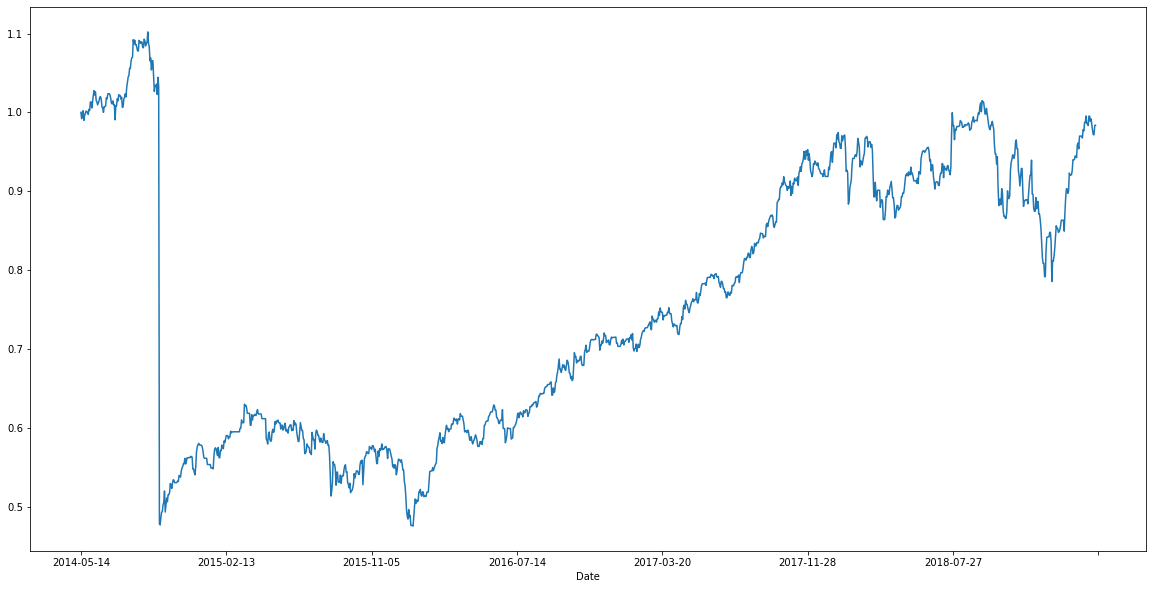

In [10]:
df['AES CORP'].plot(figsize=(20,10)) #a titre d'exemple

### Donnée nettoyée

In [11]:
df = df.loc[:,~df.apply(outlier_detector)] #~ correspond à la sélection inverse/complémentaire

In [15]:
df

,3I GROUP PLC,3M CO,A2A SpA,AAC Technologies Holdings Inc,ABACUS PROPERTY GROUP,ABB LTD-REG,ABBOTT LABORATORIES,ABBVIE INC,ABC-MART INC,ABERCROMBIE & FITCH CO-CL A,...,Yamato Holdings Co Ltd,Yuanta Financial Holding Co Lt,ZENKOKU HOSHO CO LTD,ZEON CORP,ZIONS BANCORPORATION,ZOETIS INC,Zensho Holdings Co Ltd,Zimmer Biomet Holdings Inc,Zurich Insurance Group AG,kyowa Hakko Kirin Co Ltd
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2014-05-15,0.968516,0.995621,0.969534,1.000000,1.004032,0.993399,0.982720,0.996595,0.983590,0.979416,...,0.981538,1.000000,0.973231,1.027366,0.990244,0.975318,1.006938,0.980951,1.005814,0.990909
2014-05-16,0.947776,0.996681,0.961768,1.000000,0.987903,0.994342,0.978212,1.001135,0.992821,0.977063,...,0.978022,1.003279,0.971319,1.010262,0.983444,0.984080,1.004955,0.984713,1.018992,0.976033
2014-05-19,0.947776,1.000494,0.961768,0.998837,0.983871,0.994342,0.992487,1.023454,1.002051,0.987846,...,0.974945,1.000000,0.953346,0.990878,0.983149,0.989880,0.996036,0.990956,1.018992,0.990083
2014-05-20,0.950110,0.990325,1.004182,0.984884,0.979839,0.997171,0.990233,1.012673,1.000000,0.973535,...,0.957802,0.990164,0.940344,0.995439,0.980192,0.982476,0.992071,0.970546,1.024419,0.996694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-07,2.392804,1.411441,1.917563,1.148837,1.491935,0.900754,1.923366,1.479856,1.347692,0.193491,...,1.296264,1.154098,1.592734,1.294185,1.483370,1.188078,2.645193,1.363615,1.265116,1.879339
2019-03-08,2.354323,1.418715,1.922342,1.106977,1.487903,0.890853,1.919108,1.467373,1.331282,0.184670,...,1.278242,1.140984,1.562141,1.231471,1.477605,1.195113,2.618434,1.352889,1.262791,1.863636
2019-03-10,2.354323,1.418715,1.922342,1.106977,1.487903,0.890853,1.919108,1.467373,1.331282,0.184670,...,1.278242,1.140984,1.562141,1.231471,1.477605,1.195113,2.618434,1.352889,1.262791,1.863636


### Sélection du portefeuille

In [78]:
mapping = pd.read_csv("actifs_dico.csv", index_col = 0) #lecture d'un csv tiré de la base de données

In [88]:

zones = mapping.Geographical_zone.drop_duplicates().head(3).to_numpy()
print(sectors)
print(zones)

['Financials', 'Industrials', 'Utilities', 'Information Technology', 'Real Estate', 'Health Care', 'Consumer Discretionary', 'Materials', 'Consumer Staples', 'Communication Services', 'Energy']
['EUROPE' 'NORTH AMERICA' 'ASIA/PACIFIC']


In [80]:
mapping = mapping.loc[df.columns.values] #on enlève du mapping les valeurs précédemment suprimées

Sélection alétoire des actifs à mettre dans le portefeuille à proprement parler.

In [162]:
def init_portfolio(mapping, nb_securities, ratioNA, ratioEU, ratioASIA) :
#on ne va pas faire de contrôle sur les variables en entrée, on part du principe que l'on tombe sur des chiffres ronds
    
    sectors = mapping.Sector.drop_duplicates().to_numpy().tolist()
    sectorscopy = sectors.copy() #une copie qui se vera "détruite dans le processus suivant"
    
    while len(sectors) <= nb_securities:
        sectors.append(sectorscopy.pop(np.random.randint(0,len(sectorscopy))))
        if len(sectorscopy) == 0: sectorscopy = sectors.copy()

    portfolio = []
    a = sectors.copy()
    b = mapping.copy()

    #'NORTH AMERICA': 8 securities
    for i in range(round(ratioNA*nb_securities)):
        c = a.pop(np.random.randint(0,len(a)-1)) #je sélectionne un secteur au hasard
        d = b[(b.Geographical_zone == 'NORTH AMERICA') & (b.Sector == c)].sample().index.values
        portfolio.append(d[0])
        b.drop(d[0], inplace=True)

    #'EUROPE': 6 securities
    for i in range(round((ratioEU+0.00000001)*nb_securities)):
        c = a.pop(np.random.randint(0,len(a)-1)) #je sélectionne un secteur au hasard
        d = b[(b.Geographical_zone == 'EUROPE') & (b.Sector == c)].sample().index.values
        portfolio.append(d[0])
        b.drop(d[0], inplace=True)

    #'ASIA/PACIFIC': 6 securities
    for i in range(round((ratioASIA-0.00000001)*nb_securities)):
        c = a.pop(np.random.randint(0,len(a)-1)) #je sélectionne un secteur au hasard
        d = b[(b.Geographical_zone == 'ASIA/PACIFIC') & (b.Sector == c)].sample().index.values
        portfolio.append(d[0])
        b.drop(d[0], inplace=True)
    
    return portfolio

In [166]:
portfolio = init_portfolio(mapping, 20, 0.4, 0.3, 0.3)

In [176]:
mapping_final = mapping.loc[portfolio]
mapping_final

,Geographical_zone,Country,Sector,Industry
Name,,,,
Life Technologies Corp,NORTH AMERICA,UNITED STATES,Health Care,Biotechnology
MOSAIC CO/THE,NORTH AMERICA,UNITED STATES,Materials,Chemicals
CAMECO CORP,NORTH AMERICA,CANADA,Energy,"Oil, Gas & Consumable Fuels"
People's United Financial Inc,NORTH AMERICA,UNITED STATES,Financials,Banks
BRISTOL-MYERS SQUIBB CO,NORTH AMERICA,UNITED STATES,Health Care,Pharmaceuticals
CBRE Group Inc,NORTH AMERICA,UNITED STATES,Real Estate,Real Estate Management & Devel
CAMPBELL SOUP CO,NORTH AMERICA,UNITED STATES,Consumer Staples,Food Products
FEDEX CORP,NORTH AMERICA,UNITED STATES,Industrials,Air Freight & Logistics
SAGE GROUP PLC/THE,EUROPE,UNITED KINGDOM,Information Technology,Software


On utilise notre array portfolio pour récupérer les données attendues dans la dataframe initiale.

In [171]:
df_final = dforiginal.loc[:,portfolio]

In [172]:
df_final

,Life Technologies Corp,MOSAIC CO/THE,CAMECO CORP,People's United Financial Inc,BRISTOL-MYERS SQUIBB CO,CBRE Group Inc,CAMPBELL SOUP CO,FEDEX CORP,SAGE GROUP PLC/THE,SEGRO PLC,A2A SpA,VOLKSWAGEN AG-PREF,SANDVIK AB,Liberty Global A-Equity,SAMSUNG ELECTRO-MECHANICS CO,TAISHIN FINANCIAL HOLDING,Kewpie Corp,ANHUI CONCH CEMENT CO LTD-H,MODEC INC,Baidu Inc
Date,,,,,,,,,,,,,,,,,,,,
2014-05-14,44.80,48.13,21.97,82.92,52.12,30.07,46.16,139.33,4.001000,3.65183,0.8370,188.75,92.75,43.78,66300.0,14.15,1460.0,29.05,2317.0,156.02
2014-05-15,44.19,48.15,21.66,82.19,48.93,29.05,45.96,138.68,3.924000,3.59900,0.8115,187.70,93.55,43.66,66600.0,14.40,1459.0,29.15,2315.0,155.39
2014-05-16,44.52,48.23,21.44,82.61,48.78,28.99,46.39,138.23,3.975000,3.56600,0.8050,188.10,93.30,43.83,65600.0,14.45,1456.0,28.50,2250.0,154.77
2014-05-19,44.56,48.71,21.44,83.38,49.34,29.25,46.67,139.00,3.975000,3.56600,0.8050,189.85,93.30,43.94,64600.0,14.45,1459.0,27.60,2202.0,157.65
2014-05-20,43.88,47.80,20.94,82.43,48.76,28.99,46.36,137.46,4.024886,3.54000,0.8405,190.15,95.40,43.85,64900.0,14.35,1462.0,26.55,2185.0,158.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-07,59.72,61.52,15.61,60.05,51.51,44.44,48.22,172.86,6.630000,6.55000,1.6050,149.94,149.00,25.97,101500.0,13.95,2574.0,45.30,3010.0,165.72
2019-03-08,58.38,61.43,15.63,59.04,51.39,44.44,48.56,171.78,6.600000,6.58600,1.6090,147.06,148.25,25.26,99600.0,13.85,2537.0,43.30,2893.0,163.65
2019-03-10,58.38,61.43,15.63,59.04,51.39,44.44,48.56,171.78,6.600000,6.58600,1.6090,147.06,148.25,25.26,99600.0,13.85,2537.0,43.30,2893.0,163.65


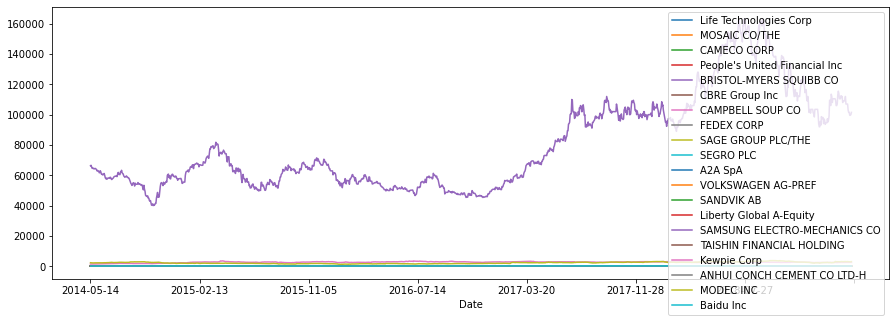

In [174]:
df_final.plot(figsize=(15,5))

*Remarque* : le caractère aléatoire de notre sélection nous a permis de voir de nombreuses actions passer dans le portefeuille, et nous permet d'identifier un autre problème de notre base de données -> *les devises*
Par exemple, nous avons que l'action de Samsung Electro-Mechanics Co était côtée en Won (du fait de se cotation supérieure à 100 000 unités de devise).

Le problème n'est pas insurmontable et cela nous empêche pas de conclure sur des sujets comme la rentabilité, la volatilité et l'exposition. Il faudra juste se maintenir à l'esprit que les quantités d'actions achetées partiront toutes du principes que toutes les actions on été converties dans une même devise. Pour obtenir le véritable nombre de part, il faudrait faire des efforts au niveau de la conversion des devises.

### Metriques diverses

Rentabilité

In [180]:
dfc = df_final.copy()

In [200]:
yields = (dfc-dfc.shift())/dfc.shift()
yields

,Life Technologies Corp,MOSAIC CO/THE,CAMECO CORP,People's United Financial Inc,BRISTOL-MYERS SQUIBB CO,CBRE Group Inc,CAMPBELL SOUP CO,FEDEX CORP,SAGE GROUP PLC/THE,SEGRO PLC,A2A SpA,VOLKSWAGEN AG-PREF,SANDVIK AB,Liberty Global A-Equity,SAMSUNG ELECTRO-MECHANICS CO,TAISHIN FINANCIAL HOLDING,Kewpie Corp,ANHUI CONCH CEMENT CO LTD-H,MODEC INC,Baidu Inc
Date,,,,,,,,,,,,,,,,,,,,
2014-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-15,-0.013616,0.000416,-0.014110,-0.008804,-0.061205,-0.033921,-0.004333,-0.004665,-0.019245,-0.014467,-0.030466,-0.005563,0.008625,-0.002741,0.004525,0.017668,-0.000685,0.003442,-0.000863,-0.004038
2014-05-16,0.007468,0.001661,-0.010157,0.005110,-0.003066,-0.002065,0.009356,-0.003245,0.012997,-0.009169,-0.008010,0.002131,-0.002672,0.003894,-0.015015,0.003472,-0.002056,-0.022298,-0.028078,-0.003990
2014-05-19,0.000898,0.009952,0.000000,0.009321,0.011480,0.008969,0.006036,0.005570,0.000000,0.000000,0.000000,0.009304,0.000000,0.002510,-0.015244,0.000000,0.002060,-0.031579,-0.021333,0.018608
2014-05-20,-0.015260,-0.018682,-0.023321,-0.011394,-0.011755,-0.008889,-0.006642,-0.011079,0.012550,-0.007291,0.044099,0.001580,0.022508,-0.002048,0.004644,-0.006920,0.002056,-0.038043,-0.007720,0.004884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-07,-0.020984,-0.008222,-0.007629,-0.019912,-0.026092,0.000000,0.009843,-0.029857,-0.001807,-0.000915,0.022293,-0.014719,-0.022310,-0.005362,0.000000,-0.003571,0.000778,-0.026853,0.000000,-0.026551
2019-03-08,-0.022438,-0.001463,0.001281,-0.016819,-0.002330,0.000000,0.007051,-0.006248,-0.004525,0.005496,0.002492,-0.019208,-0.005034,-0.027339,-0.018719,-0.007168,-0.014375,-0.044150,-0.038870,-0.012491
2019-03-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Matrice variance-covariance (a priori pas nécessaire)

In [205]:
covar = yields.drop('2014-05-14').cov()
covar

,Life Technologies Corp,MOSAIC CO/THE,CAMECO CORP,People's United Financial Inc,BRISTOL-MYERS SQUIBB CO,CBRE Group Inc,CAMPBELL SOUP CO,FEDEX CORP,SAGE GROUP PLC/THE,SEGRO PLC,A2A SpA,VOLKSWAGEN AG-PREF,SANDVIK AB,Liberty Global A-Equity,SAMSUNG ELECTRO-MECHANICS CO,TAISHIN FINANCIAL HOLDING,Kewpie Corp,ANHUI CONCH CEMENT CO LTD-H,MODEC INC,Baidu Inc
Life Technologies Corp,0.000314,8.891658e-05,0.000093,0.000136,0.000051,0.000064,0.000057,0.000090,0.000031,0.000030,0.000036,0.000068,0.000059,0.000100,0.000012,0.000012,1.139938e-05,0.000024,0.000019,0.000091
MOSAIC CO/THE,0.000089,2.003023e-04,0.000064,0.000116,0.000044,0.000059,0.000049,0.000087,0.000022,0.000022,0.000023,0.000050,0.000059,0.000067,0.000031,0.000012,8.331531e-07,0.000028,0.000023,0.000072
CAMECO CORP,0.000093,6.422358e-05,0.000448,0.000082,0.000032,0.000044,0.000040,0.000078,0.000024,0.000021,0.000032,0.000071,0.000058,0.000072,0.000035,0.000019,6.489346e-06,0.000044,0.000027,0.000091
People's United Financial Inc,0.000136,1.160153e-04,0.000082,0.000306,0.000047,0.000073,0.000064,0.000129,0.000032,0.000035,0.000037,0.000090,0.000082,0.000105,0.000043,0.000019,1.936265e-06,0.000041,0.000033,0.000102
BRISTOL-MYERS SQUIBB CO,0.000051,4.407886e-05,0.000032,0.000047,0.000231,0.000049,0.000050,0.000049,0.000032,0.000026,0.000022,0.000038,0.000030,0.000058,0.000028,0.000009,-5.700624e-06,0.000024,0.000006,0.000069
CBRE Group Inc,0.000064,5.919978e-05,0.000044,0.000073,0.000049,0.000151,0.000045,0.000062,0.000025,0.000025,0.000033,0.000045,0.000035,0.000054,0.000015,0.000008,3.206514e-06,0.000019,0.000012,0.000064
CAMPBELL SOUP CO,0.000057,4.892726e-05,0.000040,0.000064,0.000050,0.000045,0.000192,0.000052,0.000025,0.000022,0.000023,0.000041,0.000029,0.000052,0.000024,0.000009,1.443356e-05,0.000013,0.000016,0.000055
FEDEX CORP,0.000090,8.713745e-05,0.000078,0.000129,0.000049,0.000062,0.000052,0.000178,0.000031,0.000030,0.000031,0.000065,0.000061,0.000082,0.000035,0.000019,2.063986e-05,0.000040,0.000036,0.000085
SAGE GROUP PLC/THE,0.000031,2.156084e-05,0.000024,0.000032,0.000032,0.000025,0.000025,0.000031,0.000182,0.000059,0.000037,0.000077,0.000070,0.000045,0.000031,0.000009,2.627303e-05,0.000034,0.000028,0.000043
SEGRO PLC,0.000030,2.213181e-05,0.000021,0.000035,0.000026,0.000025,0.000022,0.000030,0.000059,0.000131,0.000050,0.000065,0.000054,0.000049,0.000032,0.000013,2.194383e-05,0.000034,0.000024,0.000043


### Exportation

In [206]:
with pd.ExcelWriter('portfolio.xlsx') as writer:  
    df_final.to_excel(writer, sheet_name='Valeurs')
    mapping_final.to_excel(writer, sheet_name='Mapping')
    yields.to_excel(writer, sheet_name='Rendements')
    covar.to_excel(writer, sheet_name='Matrice Variance-Covariance')

### Benchmarks

In [8]:
dfb = pd.read_csv("indexes_pivot.csv", index_col = 0)
dfb.head()

,ASX200,BEL20,BOVESPA,CAC40,DAX,DOWJONES,EUROSTOXX50,FOOTSIE100,HANGSENG,IBEX35,ITALY40,MSCI CANADA,MSCI RUSSIA,MSCI SOUTHAFRICA,MSCI THAILAND,MSCI WORLD,NASDAQ100,NIKKEI400,S&P500,SMI
Date,,,,,,,,,,,,,,,,,,,,
2014-05-14,5496.496,3157.51,54412.54,4501.04,9754.39,16613.97,3210.42,6878.49,22582.77,10613.9,21184.60,1850.30,688.02,1226.20,491.13,4458.84,3593.249,10767.97,1888.53,8611.70
2014-05-15,5510.839,3112.00,53855.54,4444.93,9656.05,16446.81,3163.22,6840.89,22730.86,10365.0,20419.62,1839.49,684.51,1213.70,491.12,4426.60,3565.174,10727.94,1870.85,8644.74
2014-05-16,5479.044,3098.15,53975.76,4456.28,9629.10,16491.31,3172.72,6855.81,22712.91,10478.7,20648.59,1829.82,689.22,1208.17,496.99,4430.87,3587.199,10564.03,1877.86,8683.62
2014-05-19,5408.975,3105.37,53353.10,4469.76,9659.39,16511.86,3169.90,6844.55,22704.50,10425.5,20318.46,1829.82,706.96,1221.11,498.88,4437.38,3615.617,10491.39,1885.08,8646.02
2014-05-20,5420.352,3105.36,52366.19,4452.35,9639.08,16374.31,3163.93,6802.00,22834.68,10453.8,20379.85,1832.50,709.80,1222.28,490.24,4417.15,3600.308,10522.16,1872.83,8635.61


In [9]:
last_known_value = dfb.transpose().iloc[:,-1].sort_values(ascending=False)
last_known_value

BOVESPA             97746.770
HANGSENG            28920.870
DOWJONES            25556.100
ITALY40             20631.190
NIKKEI400           14279.920
DAX                 11524.170
SMI                  9331.620
IBEX35               9161.700
NASDAQ100            7212.361
FOOTSIE100           7151.150
ASX200               6174.823
MSCI WORLD           6006.510
MSCI SOUTHAFRICA     5270.250
CAC40                5270.250
BEL20                4424.915
EUROSTOXX50          3303.950
S&P500               2794.730
MSCI CANADA          2062.210
MSCI RUSSIA           630.160
MSCI THAILAND         588.800
Name: 2019-03-12, dtype: float64

**Nous souhaitons déterminer pour chaque zone géographique les 3 indices à incorporer.**

Remarques:
* La base de donnée ne nous permet pas directement de d'associer à chaque fond indiciel une zone géographique du fait de l'existence de fonds transcontinentaux comme le MSCI World
* Il faut donc pour chaque fond faire une rapide recherche pour connaitre sa provenance.
* Nous remarquons ici à nouveau l'impact des devises, et de manière générale la nature artificielle de la cotation en valeur absolu de ces indices. Par exemple : BOVESPA n'est pas l'indice regroupant les plus fortes valeurs de notre base de données, il s'agit juste d'un indice Brésilien dont le niveau est enflée entre autre par la faible valeur du Real brésilien.

**Nous allons donc plutôt nous reposer sur la MARKETCAP représentée par ces indices pour faire nos choix sur les 3 zones** : 

North America : 
* S&P500
* Dowjones
* NASDAQ100

Asia : 
* NIKKEI400 (bourse de Tokyo)
* Hang Seng (bourse de Hong Kong)
* MSCI Thailand - beaucoup moins représentatif que les deux ci-dessus

Europe : 
* EUROSTOXX50
* FTSE 100 (bourse de Londre)
* CAC40 - choix complètement arbitraire. Il pouvait s'effectuer entre toutes les places de marchées de l'Europe continentale, le DAX pour l'Allemagne, ITALY 40, IBEX pour l'Espagne etc.

In [10]:
benchmark = ['NIKKEI400','HANGSENG','MSCI THAILAND','EUROSTOXX50','FOOTSIE100','CAC40','S&P500','DOWJONES','NASDAQ100']

In [11]:
dfbenchmark = dfb.loc[:,benchmark]
dfbenchmark.head()

,NIKKEI400,HANGSENG,MSCI THAILAND,EUROSTOXX50,FOOTSIE100,CAC40,S&P500,DOWJONES,NASDAQ100
Date,,,,,,,,,
2014-05-14,10767.97,22582.77,491.13,3210.42,6878.49,4501.04,1888.53,16613.97,3593.249
2014-05-15,10727.94,22730.86,491.12,3163.22,6840.89,4444.93,1870.85,16446.81,3565.174
2014-05-16,10564.03,22712.91,496.99,3172.72,6855.81,4456.28,1877.86,16491.31,3587.199
2014-05-19,10491.39,22704.50,498.88,3169.90,6844.55,4469.76,1885.08,16511.86,3615.617
2014-05-20,10522.16,22834.68,490.24,3163.93,6802.00,4452.35,1872.83,16374.31,3600.308


In [12]:
yields_b = (dfbenchmark-dfbenchmark.shift())/dfbenchmark.shift()
covar_b = yields_b.drop('2014-05-14').cov()

In [13]:
with pd.ExcelWriter('benchmark.xlsx') as writer:  
    dfbenchmark.to_excel(writer, sheet_name='Valeurs')
    yields_b.to_excel(writer, sheet_name='Rendements')
    covar_b.to_excel(writer, sheet_name='Matrice Variance-Covariance')

### Pour plus tard, chemin le plus long EUROSTOXX50 S&P500 MSCI WORLD

In [14]:
dfb[['EUROSTOXX50', 'S&P500', 'MSCI WORLD']]

,EUROSTOXX50,S&P500,MSCI WORLD
Date,,,
2014-05-14,3210.42,1888.53,4458.84
2014-05-15,3163.22,1870.85,4426.60
2014-05-16,3172.72,1877.86,4430.87
2014-05-19,3169.90,1885.08,4437.38
2014-05-20,3163.93,1872.83,4417.15
...,...,...,...
2019-03-06,3324.67,2771.45,5989.41
2019-03-07,3308.85,2748.93,5942.56
2019-03-08,3283.60,2743.07,5913.21


In [15]:
with pd.ExcelWriter('benchmark_EUROSTOXX_SP500_MSCI_plus_long_chemin.xlsx') as writer:  
    dfb[['EUROSTOXX50', 'S&P500', 'MSCI WORLD']].to_excel(writer, sheet_name='Valeurs')